In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

Found 60 images belonging to 3 classes.


c:\Users\CATUR WARGA COMPUTER\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 935ms/step - accuracy: 0.9333 - loss: 0.0856 - precision: 0.9333 - recall: 0.9333
Loss: 0.08561422675848007
Accuracy: 0.9333333373069763
Precision: 0.9333333373069763
Recall: 0.9333333373069763
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step

Metrics using sklearn:
Accuracy: 0.9333333333333333
Precision: 0.9444444444444445
Recall: 0.9333333333333333
F1 Score: 0.9326599326599326

Classification Report:
              precision    recall  f1-score   support

     Manggis       1.00      1.00      1.00        20
      Pisang       1.00      0.80      0.89        20
    Rambutan       0.83      1.00      0.91        20

    accuracy                           0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60



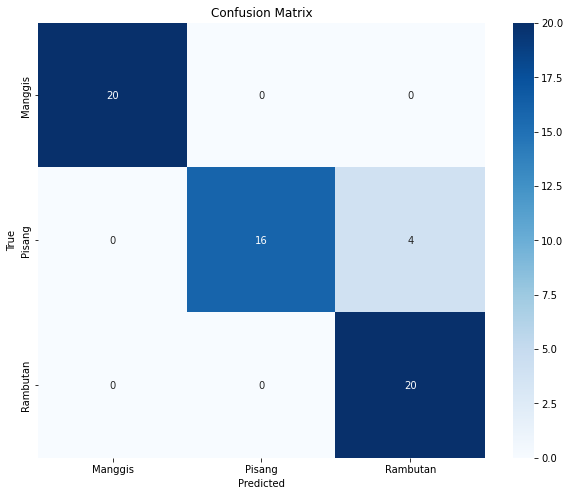

In [6]:
# Path ke model yang disimpan dalam format .h5
model_path = "./models/v4_last.h5"

# Memuat model
model = load_model(model_path)

# Path ke direktori dataset
test_dir = "./dataset/test_set_hsv"

# Membuat objek ImageDataGenerator untuk data uji
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load data uji
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(300, 300),
    batch_size=64,
    class_mode='categorical',
    shuffle=False  # Pastikan shuffle dinonaktifkan untuk menjaga urutan data
)

# Evaluasi model pada data uji
loss, accuracy, precision, recall = model.evaluate(test_generator)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Menghitung prediksi untuk data uji
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Mendapatkan label sebenarnya dari test_generator
y_true = test_generator.classes

# Mendapatkan label class dari test_generator
class_labels = list(test_generator.class_indices.keys())

# Menghitung F1-score dan metrik lainnya
accuracy_sklearn = accuracy_score(y_true, y_pred)
precision_sklearn = precision_score(y_true, y_pred, average='weighted')
recall_sklearn = recall_score(y_true, y_pred, average='weighted')
f1_sklearn = f1_score(y_true, y_pred, average='weighted')

print("\nMetrics using sklearn:")
print(f"Accuracy: {accuracy_sklearn}")
print(f"Precision: {precision_sklearn}")
print(f"Recall: {recall_sklearn}")
print(f"F1 Score: {f1_sklearn}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predictions for D:/kuliah/Tugas Akhir/Code/Klasifikasi Jenis Buah Lokal/dataset/#Mentah/!(500) Mentah/Manggis/IMG_3078.JPG: Manggis

Confidence result: 
Manggis 	:   1.0
Pisang 	:   9.20568e-10
Rambutan 	:   3.380182e-08


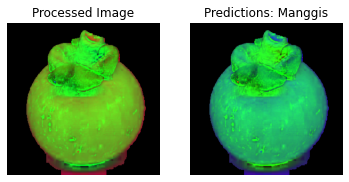

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predictions for D:/kuliah/Tugas Akhir/Code/Klasifikasi Jenis Buah Lokal/dataset/#Mentah/!(500) Mentah/Pisang/IMG_5758.jpg: Pisang

Confidence result: 
Manggis 	:   0.00052016234
Pisang 	:   0.9824849
Rambutan 	:   0.016995026


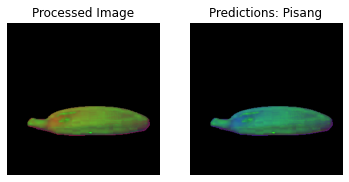

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predictions for D:/kuliah/Tugas Akhir/Code/Klasifikasi Jenis Buah Lokal/dataset/#Mentah/!(500) Mentah/Rambutan/IMG20231216154104.jpg: Pisang

Confidence result: 
Manggis 	:   0.014833432
Pisang 	:   0.8583349
Rambutan 	:   0.12683168


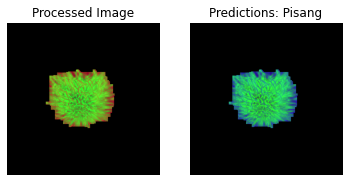

In [15]:
# Load the saved model
model = tf.keras.models.load_model('D:/kuliah/Tugas Akhir/Code/Klasifikasi Jenis Buah Lokal/models/Lama/v4_last.h5')

def preprocess_image(file):
    kernelOpen = np.ones((5, 5))
    kernelClose = np.ones((20, 20))

    # Read RGB image
    rgb = cv2.imread(file)

    # Convert BGR to HSV
    hsv = cv2.cvtColor(rgb, cv2.COLOR_BGR2HSV)

    lower_white = np.array([0, 0, 168])
    upper_white = np.array([172, 111, 255])

    whitemask = cv2.inRange(hsv, lower_white, upper_white)

    # Inverse white mask to detect non-white regions
    non_whitemask = cv2.bitwise_not(whitemask)

    # Add a range for grey colors (adjust the thresholds based on your needs)
    lower_grey = np.array([0, 0, 100])
    upper_grey = np.array([172, 30, 255])

    # Create a mask for grey colors
    greymask = cv2.inRange(hsv, lower_grey, upper_grey)

    # Combine masks to exclude white and grey regions
    non_whitemask_no_grey = cv2.bitwise_and(non_whitemask, cv2.bitwise_not(greymask))

    # Apply open morphological operation
    maskOpen = cv2.morphologyEx(non_whitemask_no_grey, cv2.MORPH_OPEN, kernelOpen)

    # Apply close morphological operation
    maskClose = cv2.morphologyEx(maskOpen, cv2.MORPH_CLOSE, kernelClose)

    # Final mask after closing
    maskFinal = maskClose

    # Bitwise and to apply the mask to the HSV image
    maskFinally = cv2.bitwise_and(hsv, hsv, mask=maskFinal)

    # Convert back to RGB
    masked_rgb = cv2.cvtColor(maskFinally, cv2.COLOR_HSV2BGR)

    # Resize the image to 300x300
    resized_image = cv2.resize(maskFinally, (300, 300), interpolation=cv2.INTER_AREA)

    # Normalize the image
    img_array = resized_image / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array, resized_image

# List of image paths
img_paths = [
    'D:/kuliah/Tugas Akhir/Code/Klasifikasi Jenis Buah Lokal/dataset/#Mentah/!(500) Mentah/Manggis/IMG_3078.JPG',           # Manggis
    'D:/kuliah/Tugas Akhir/Code/Klasifikasi Jenis Buah Lokal/dataset/#Mentah/!(500) Mentah/Pisang/IMG_5758.jpg',            # Pisang
    'D:/kuliah/Tugas Akhir/Code/Klasifikasi Jenis Buah Lokal/dataset/#Mentah/!(500) Mentah/Rambutan/IMG20231216154104.jpg'  # Rambutan
]

# Labels for the classes
labels = ['Manggis', 'Pisang', 'Rambutan']

# Process and predict each image
for img_path in img_paths:
    img_array, processed_image = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions, axis=1)[0]
    print(f"Predictions for {img_path}: {labels[predicted_index]}")
    
    # Print confidence results for each class
    print("\nConfidence result: ")
    for i, j in enumerate(predictions[0]):
        print(labels[i], "\t:  ", j)
    
    # Display the processed image with predictions
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Processed Image')
    plt.axis('off')

    # Remove the batch dimension for displaying img_array
    img_display = np.squeeze(img_array, axis=0)

    # Display the normalized image array
    plt.subplot(1, 2, 2)
    plt.imshow(img_display)
    plt.title(f'Predictions: {labels[predicted_index]}')
    plt.axis('off')

    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Predictions for D:/kuliah/Tugas Akhir/Code/Klasifikasi Jenis Buah Lokal/dataset/#Mentah/!(500) Mentah/Manggis/IMG_3078.JPG: Manggis

Confidence result: 
Manggis 	:   0.9999999
Pisang 	:   2.0760398e-09
Rambutan 	:   1.64677e-07


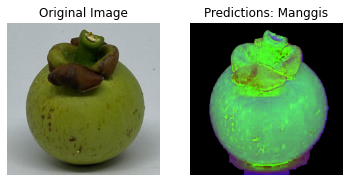

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predictions for D:/kuliah/Tugas Akhir/Code/Klasifikasi Jenis Buah Lokal/dataset/#Mentah/!(500) Mentah/Pisang/IMG_5758.jpg: Pisang

Confidence result: 
Manggis 	:   0.0011714682
Pisang 	:   0.9459578
Rambutan 	:   0.052870683


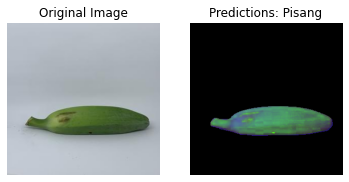

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predictions for D:/kuliah/Tugas Akhir/Code/Klasifikasi Jenis Buah Lokal/dataset/#Mentah/!(500) Mentah/Rambutan/IMG20231216154104.jpg: Rambutan

Confidence result: 
Manggis 	:   0.0067885714
Pisang 	:   0.3060524
Rambutan 	:   0.68715906


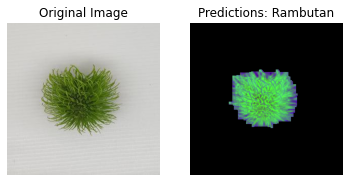

In [27]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('D:/kuliah/Tugas Akhir/Code/Klasifikasi Jenis Buah Lokal/models/Lama/v4_last.h5')

def preprocess_image(file):
    kernelOpen = np.ones((5, 5))
    kernelClose = np.ones((20, 20))

    # Read RGB image
    rgb = cv2.imread(file)

    # Convert BGR to HSV
    hsv = cv2.cvtColor(rgb, cv2.COLOR_BGR2HSV)

    lower_white = np.array([0, 0, 168])
    upper_white = np.array([172, 111, 255])

    whitemask = cv2.inRange(hsv, lower_white, upper_white)

    # Inverse white mask to detect non-white regions
    non_whitemask = cv2.bitwise_not(whitemask)

    # Add a range for grey colors (adjust the thresholds based on your needs)
    lower_grey = np.array([0, 0, 100])
    upper_grey = np.array([172, 30, 255])

    # Create a mask for grey colors
    greymask = cv2.inRange(hsv, lower_grey, upper_grey)

    # Combine masks to exclude white and grey regions
    non_whitemask_no_grey = cv2.bitwise_and(non_whitemask, cv2.bitwise_not(greymask))

    # Apply open morphological operation
    maskOpen = cv2.morphologyEx(non_whitemask_no_grey, cv2.MORPH_OPEN, kernelOpen)

    # Apply close morphological operation
    maskClose = cv2.morphologyEx(maskOpen, cv2.MORPH_CLOSE, kernelClose)

    # Final mask after closing
    maskFinal = maskClose

    # Bitwise and to apply the mask to the HSV image
    maskFinally = cv2.bitwise_and(hsv, hsv, mask=maskFinal)

    # Convert back to RGB
    masked_rgb = cv2.cvtColor(maskFinally, cv2.COLOR_HSV2BGR)

    # Resize the image to 300x300
    resized_image = cv2.resize(masked_rgb, (300, 300), interpolation=cv2.INTER_AREA)

    # Normalize the image
    img_array = resized_image / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array, resized_image

# List of image paths
img_paths = [
    'D:/kuliah/Tugas Akhir/Code/Klasifikasi Jenis Buah Lokal/dataset/#Mentah/!(500) Mentah/Manggis/IMG_3078.JPG',           # Manggis
    'D:/kuliah/Tugas Akhir/Code/Klasifikasi Jenis Buah Lokal/dataset/#Mentah/!(500) Mentah/Pisang/IMG_5758.jpg',            # Pisang
    'D:/kuliah/Tugas Akhir/Code/Klasifikasi Jenis Buah Lokal/dataset/#Mentah/!(500) Mentah/Rambutan/IMG20231216154104.jpg'  # Rambutan
]

# Labels for the classes
labels = ['Manggis', 'Pisang', 'Rambutan']

# Process and predict each image
for img_path in img_paths:
    img_array, processed_image = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions, axis=1)[0]
    print(f"Predictions for {img_path}: {labels[predicted_index]}")
    
    # Print confidence results for each class
    print("\nConfidence result: ")
    for i, j in enumerate(predictions[0]):
        print(labels[i], "\t:  ", j)
    
    # Display the original image
    original_image = cv2.imread(img_path)
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Original Image')
    plt.axis('off')

    # Display the processed image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_RGB2HSV))
    plt.title(f'Predictions: {labels[predicted_index]}')
    plt.axis('off')

    plt.show()
